# Coupled Simple Land Simulations

##### Marysa M Laguë
##### 2017.02.22

## Comparison of coupled simulations using maps and vertical cross sections to look at how various pertubations of albedo, height, evaporative resistance, and soil heat capacity change selected variables.

## Setup 
(This section just has code needed to manipulate the netcdf files, make plots, load data, etc)

### modules


In [24]:
# For interactive in-line plots:
#%matplotlib nbagg  

# For inline plots:
%matplotlib inline     

import matplotlib as mpl
import numpy as np
import os
import datetime
import netCDF4 as nc
import xarray as xr
from scipy import interpolate
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import brewer2mpl as cbrew
import scipy.io as sio

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

In [25]:
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

### Functions

##### Plotting

### Maps:

In [26]:

def mml_fig(LN,LT,mapdata,ds,myvar,proj,title=None,clim=None,colmap=None,units=None):
    #x_data, y_data, x_label, y_label, title=None, xlim=None, ylim=None
    ''' Desctiption of function goes here. Also, single and double quotes are the same...'''

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    mp = Basemap(projection='robin',lon_0=180.,lat_0 = 0) # can't make it start anywhere other than 180???
    mp.drawcoastlines()
    mp.drawmapboundary(fill_color='1.')  # make map background white
    parallels = np.arange(-90.,90,20.)
    mp.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,linewidth=0.5,dashes=[1,2])
    meridians = np.arange(0.,360.,20.)
    mp.drawmeridians(meridians,linewidth=0.5,dashes=[1,2])
    #(x, y) = m(LONXY, LATXY)
    cs = mp.pcolormesh(LN,LT,mapdata,cmap=plt.cm.inferno,latlon=True)
    
    if cm:
        cs.cmap = colmap
    else:
        cs.cmap = plt.cm.inferno    
    
    cbar = mp.colorbar(cs,location='bottom',pad="5%")
    cbar.set_label('units: '+ds[myvar].units)
    
    if title:
        plt.title(title,fontsize=12)
    else:
        plt.title(ds[myvar].long_name,fontsize=12)
    
    if clim:
        cbar.set_clim(clim[0],clim[1])
        cs.set_clim(clim[0],clim[1])
    
    
    
    
    #plt.suptitle('units?')
    #plt.show()
    
    
    #plt.show()
    return fig, mp, ax, cbar, cs

def mml_map(LN,LT,mapdata,ds,myvar,proj,title=None,clim=None,colmap=None,cb_ttl=None):
    # need to have already opened a figure/axis
    #plt.sca(ax)
    
    # There is a way to make a single basemap, save it, and just call that vover and over, ie a blank little map, 
    # that we then build maps on top of (pcolours)
    mp = Basemap(projection='robin',lon_0=180.,lat_0 = 0,resolution='c') # can't make it start anywhere other than 180???
    mp.drawcoastlines()
    mp.drawmapboundary(fill_color='1.')  # make map background white
    parallels = np.arange(-90.,90,20.)
    mp.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,linewidth=0.5,dashes=[1,2])
    meridians = np.arange(0.,360.,20.)
    mp.drawmeridians(meridians,linewidth=0.5,dashes=[1,2])
    #(x, y) = m(LONXY, LATXY)
    cs = mp.pcolormesh(LN,LT,mapdata,cmap=plt.cm.inferno,latlon=True)
    
    if cm:
        cs.cmap = colmap
    else:
        cs.cmap = plt.cm.inferno    
    
    cbar = mp.colorbar(cs,location='bottom',pad="5%")
    
    if cb_ttl:
        cbar.set_label(cb_ttl,fontsize=12)
    else:
        cbar.set_label('units: '+ds[myvar].units,fontsize=12)
    
    if title:
        plt.title(title,fontsize=12)
    else:
        plt.title(ds[myvar].long_name,fontsize=12)
    
    if clim:
        cbar.set_clim(clim[0],clim[1])
        cs.set_clim(clim[0],clim[1])
    
    
    
    
    #plt.suptitle('units?')
    #plt.show()
    
    
    #plt.show()
    return mp, cbar, cs



### Single perturbation grid comparisions

In [27]:

def sl_clm_fig(myvar,myds,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff):

    ###  Make a 3x3 subplot
    fig, axes = plt.subplots(3, 3, figsize=(20,12))

    # hide the plots below the diagonal
    axes[1, 0].axis('off')
    axes[2, 0].axis('off')
    axes[2, 1].axis('off')

    # CLM 4.5:
    ax0 = axes.flatten()[0]
    plt.sca(ax0)
    mapdata_nan = mapdata_1
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = ttl_1

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata1,myds,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    #cbar0.title('units = unitless')

    # SL_clm: 
    ax1 = axes.flatten()[1]
    plt.sca(ax1)
    mapdata_nan = mapdata_2
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = ttl_2

    mp2, cbar2, cs2 = mml_map(LN,LT,mapdata2,myds,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    # SL_ceres:
    ax2 = axes.flatten()[2]
    plt.sca(ax2)
    mapdata_nan = mapdata_3
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = ttl_3
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata3,myds,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )


    # SL_clm - clm5:
    ax4 = axes.flatten()[4]
    plt.sca(ax4)
    mapdata_nan = mapdata_sl - mapdata_clm
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata12 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = 'Simple Land (clm '+r'$\alpha$'+') - CLM5.0'
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata12,myds,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )

    # SL_cer - clm5:
    ax5 = axes.flatten()[5]
    plt.sca(ax5)
    mapdata_nan = mapdata_3 - mapdata_1
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata13 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = 'Simple Land (ceres '+r'$\alpha$'+') - CLM5.0'
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata13,myds,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )


    # SL_cer - SL_clm:
    ax8 = axes.flatten()[8]
    plt.sca(ax8)
    mapdata_nan = mapdata_3 - mapdata_2
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata23 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = 'Simple Land ceres '+r'$\alpha$'+' - clm '+r'$\alpha$'
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata23,myds,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )



    # Figure title
    fig.subplots_adjust(top=0.95)
    fig.suptitle(ttl_main, 
                 fontsize=18)

    return fig,axes

def pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT):
    # Make a 3x3 plot showing how high and low perturbations effect some field
    
    # Inputs:
    # myvar: string corresponding to the variable in question
    # ds1, ds2, ds3 : the handles for the 3 data sets of interest
    # mapdata_1, mapdata_2, mapdata_3 : the mapdata for each simulation - not using ds directly incase its a field we have to calculate
    # ttl_1, ttl_2, ttl_3 : names of each simulation, e.g. "simulation 1" 
    # ttl_main : the title explaining what we're plotting
    
    
    fig, axes = plt.subplots(3, 3, figsize=(20,18))
    
    # ds1:
    ax0 = axes.flatten()[0]
    plt.sca(ax0)
    ttl = ttl_1

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata_1,ds1,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # blank: 
    #ax1 = axes.flatten()[1]
    #plt.sca(ax1)
    axes[0, 1].axis('off')

    # blank:
    #ax2 = axes.flatten()[2]
    #plt.sca(ax2)
    axes[0, 2].axis('off')
    
    # ds2:
    ax3 = axes.flatten()[3]
    plt.sca(ax3)
    ttl = ttl_2

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata_2,ds1,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # ds1 - ds2:
    ax4 = axes.flatten()[4]
    plt.sca(ax4)
    ttl = ttl_1 + ' - ' + ttl_2
    mapdata = mapdata_1 - mapdata_2

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # blank
    #ax5 = axes.flatten()[5]
    #plt.sca(ax5)
    axes[1, 2].axis('off')
    
    # ds3:
    ax6 = axes.flatten()[6]
    plt.sca(ax6)
    ttl = ttl_3

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata_3,ds1,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # ds1 - ds3:
    ax7 = axes.flatten()[7]
    plt.sca(ax7)
    ttl = ttl_1 + ' - ' + ttl_3
    mapdata = mapdata_1 - mapdata_3

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    
    # ds2 - ds3:
    ax8 = axes.flatten()[8]
    plt.sca(ax8)
    ttl = ttl_2 + ' - ' + ttl_3
    mapdata = mapdata_2 - mapdata_3

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    fig.subplots_adjust(top=0.95)
    fig.suptitle(ttl_main, 
                 fontsize=18)

    return fig,axes


### Grids of maps

In [28]:

def pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT):
    # Make a 3x4 plot showing the response of a single variable across the 4 different perturbation experiments, plotting
    #
    #  alpha1 - alpha2 |     h1 - h2 |     rs1 - rs2
    #
    #
    
    # Inputs:
    # myvar: string corresponding to the variable in question
    # ds0, mapdata_0, ttl_0 = info for the base case (no perturbations)
    # ds1a, ds1b, etc : the handles for the 4 data sets of interest, where a is the lower perturbation and b is the higher perturbation
    # mapdata_1, mapdata_2, mapdata_3 : the mapdata for each simulation - not using ds directly incase its a field we have to calculate
    # ttl_1, ttl_2, ttl_3 : names of each simulation, e.g. "simulation 1" 
    # ttl_main : the title explaining what we're plotting
    
    
    fig, axes = plt.subplots(1, 3, figsize=(40,10))
    
    #------------------------------------------
    # ALBEDO 
    
    # alpha1 - alpha2 :
    ax0 = axes.flatten()[0]
    plt.sca(ax0)
    ttl = 'Low albedo (alpha=.1) - high albedo (alpha=.3)'
    mapdata = mapdata_1a - mapdata_1b

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    #------------------------------------------
    # ROUGHNESS HEIGHT
    
    # hc1 - hc2 :
    ax1 = axes.flatten()[1]
    plt.sca(ax1)
    ttl = 'Low roughness (h=.5 m) - high roughness (h=2 m)'
    mapdata = mapdata_2a - mapdata_2b

    mp1, cbar1, cs1 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    #------------------------------------------
    # Evaporative Resistance
    
    # rs1 - s2
    ax2 = axes.flatten()[2]
    plt.sca(ax2)
    ttl = 'Low evap res (res=30 s/m)) - high evap res (res=200 s/m))'
    mapdata = mapdata_3a - mapdata_3b

    mp2, cbar2, cs2 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    
    #------------------------------------------
    
    axs=[ax0,ax1,ax2]
    for ax in axs:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(24)
    
    cbs=[cbar0,cbar1,cbar2]
    for cb in cbs:
        ax = cb.ax
        cb.ax.tick_params(labelsize=14)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(20)
        #for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        #    item.set_fontsize(20)
    
    #fig.subplots_adjust(top=0.95)
    fig.suptitle(ttl_main, 
                 fontsize=30)

    return fig,axes


### Zonal Figures

In [29]:


def zonal_fig(data,lat,lev,colmap,clim,ttl,units,levels):
    
    mp = plt.contourf(np.sin(lat*np.pi/180),lev,data,levels,cmap=colmap)
    
    mp.set_clim(vmin=clim[0],vmax=clim[1])

    #mp.colorbar()
    #cbar = plt.colorbar(mp,boundaries=np.linspace(clim[0], clim[1], 50))
    #cbar = plt.colorbar(mp,vmin=clim[0],vmax=clim[1])
    cbar = plt.colorbar(mp)
    #cbar = 
    cbar.set_label(units,fontsize=20)
    #cbar.set_clim(vmin=clim[0],vmax=clim[1])
    #cbar.ax.set_clim(vmin=clim[0],vmax=clim[1])
    
    
    plt.title(ttl)
    plt.ylabel('Pressure [hPa]')
    plt.xlabel('Latitude [degrees N]')

    tx = np.sin(np.array([-90,-60,-30,0,30,60,90])*np.pi/180)
    tx_name = ['-90','-60','-30','0','30','60','90']
    ax0.set_xticks(tx)
    ax0.set_xticklabels(tx_name)
 
    return mp, cbar


def pert4_zonal_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT):
    # Make a 3x4 plot showing the response of a single variable AS A VERTICAL X ZONAL plot
    # across the 4 different perturbation experiments, plotting
    #
    # alpha1 - base    |    alpha2 - base   |     alpha1 - alpha2
    # h1 - base        |    h2 - base       |     h1 - h2
    # cv1 - base       |    cv2 - base      |     cv1 - cv2
    # rs1 - base       |    rs2 - base      |     rs1 - rs2
    #
    # with sin(lat) on the x-axis and pressure on the y axis
    #
    # Input (mapdata) should be provided already in a zonal format, ie lat x vert , so that there is flexibility
    # as far as plotting averages vs sums goes. 
    
    # Inputs:
    # myvar: string corresponding to the variable in question
    # ds0, mapdata_0, ttl_0 = info for the base case (no perturbations)
    # ds1a, ds1b, etc : the handles for the 4 data sets of interest, where a is the lower perturbation and b is the higher perturbation
    # mapdata_1, mapdata_2, mapdata_3 : the mapdata for each simulation - not using ds directly incase its a field we have to calculate
    # ttl_1, ttl_2, ttl_3 : names of each simulation, e.g. "simulation 1" 
    # ttl_main : the title explaining what we're plotting

    
    fig, axes = plt.subplots(4, 3, figsize=(40,30))
    
    lat = ds0.lat.values
    lev = ds0.lev.values
    
    clim = clim_diff
    levels = np.linspace(clim[0], clim[1], 50)
    
    #------------------------------------------
    # ALBEDO 
    
    # alpha1 - base :
    ax0 = axes.flatten()[0]
    plt.sca(ax0)
    ttl = 'Low albedo (alpha=.1) - base (alpha=.2)'
    data = mapdata_1a - mapdata_0
    
    #p0 = plt.contourf(mapdata,cmap=cmap_diff)
    #ax0.set_ylim(0)
    #mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp0, cb0 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    
    # alpha2 - base :
    ax1 = axes.flatten()[1]
    plt.sca(ax1)
    ttl = 'High albedo (alpha=.3) - base (alpha=.2)'
    data = mapdata_1b - mapdata_0

    #mp1, cbar1, cs1 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp1, cb1 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    
    # alpha1 - alpha2 :
    ax2 = axes.flatten()[2]
    plt.sca(ax2)
    ttl = 'Low albedo (alpha=.1) - high albedo (alpha=.3)'
    data = mapdata_1a - mapdata_1b

    #mp2, cbar2, cs2 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp2, cb2 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    #------------------------------------------
    # ROUGHNESS HEIGHT
    
    # hc1 - base :
    ax3 = axes.flatten()[3]
    plt.sca(ax3)
    ttl = 'Low roughness (h=.5 m) - base (h=1 m)'
    data = mapdata_2a - mapdata_0

    #mp3, cbar3, cs3 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp3, cb3 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    # hc2 - base :
    ax4 = axes.flatten()[4]
    plt.sca(ax4)
    ttl = 'Low roughness (h=10 m) - base (h=1 m)'
    data = mapdata_2b - mapdata_0

    #mp4, cbar4, c4 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp4, cb4 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)


    # hc1 - hc2 :
    ax5 = axes.flatten()[5]
    plt.sca(ax5)
    ttl = 'Low roughness (h=.5 m) - high roughness (h=10 m)'
    data = mapdata_2a - mapdata_2b

    #mp5, cbar5, cs5 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp5, cb5 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    #------------------------------------------
    # Evaporative Resistance
    
    # rs1 - base :
    ax6 = axes.flatten()[6]
    plt.sca(ax6)
    ttl = 'Low evap resistance (res=30 s/m) - base (res=100 s/m))'
    data = mapdata_3a - mapdata_0

    #mp6, cbar6, cs6 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp6, cb6 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    # rs2 - base :
    ax7 = axes.flatten()[7]
    plt.sca(ax7)
    ttl = 'High evap resistance (res=200 s/m)) - base (res=100 s/m))'
    data = mapdata_3b - mapdata_0

    #mp7, cbar7, cs7 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp7, cb7 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)


    # rs1 - s2
    ax8 = axes.flatten()[8]
    plt.sca(ax8)
    ttl = 'Low evap res (res=30 s/m)) - high evap res (res=200 s/m))'
    data = mapdata_3a - mapdata_3b

    #mp8, cbar8, cs8 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp8, cb8 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    #------------------------------------------
    # SOIL HEAT CAPACITY
    
    # cv1 - base :
    ax9 = axes.flatten()[9]
    plt.sca(ax9)
    ttl = 'Low soil heat capacity (cv=1.5e6 J/m3/K) - base (cv=2e6 J/m3/K)'
    data = mapdata_4a - mapdata_0

    #mp9, cbar9, cs9 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp9, cb9 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    # cv2 - base :
    ax10 = axes.flatten()[10]
    plt.sca(ax10)
    ttl = 'High soil heat capacity (cv=3e6 J/m3/K) - base (cv=2e6 J/m3/K)'
    data = mapdata_4b - mapdata_0

    #mp10, cbar10, cs10 = mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp10, cb10 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)


    # cv2 - cv2 :
    ax11 = axes.flatten()[11]
    plt.sca(ax11)
    ttl = 'Low (cv=1.5e6 J/m3/K) - high (cv=3e6 J/m3/K) soil heat capacity'
    data = mapdata_4a - mapdata_4b

    #mp11, cbar11, cs11= mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    mp11, cb11 = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

    
    #------------------------------------------
    
    axs=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
    for ax in axs:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(24)
    
    cbs=[cb0,cb1,cb2,cb3,cb4,cb5,cb6,cb7,cb8,cb9,cb10,cb11]
    for cb in cbs:
        ax = cb.ax
        cb.ax.tick_params(labelsize=14)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(20)
        #for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        #    item.set_fontsize(20)
    
    fig.subplots_adjust(top=0.95)
    fig.suptitle(ttl_main, 
                 fontsize=30)

    return fig,axes

***

## Load the data 
(Point to the location of the files then open with xarray)

In [30]:
# Path to save figures:
figpath = '/home/disk/eos3/mlague/simple_land/scripts/python/analysis/global_pert/figures/'

# Point at the data sets
#ext_dir = '/home/disk/eos3/mlague/cesmruns/SimpleLand/global_pert/'
ext_dir = '/home/disk/eos3/mlague/simple_land/output/global_pert/'

# Coupled simulations:
sims = ['global_a2_cv2_hc1_rs100',
       'global_a1_cv2_hc1_rs100','global_a3_cv2_hc1_rs100',
       'global_a2_cv2_hc0.5_rs100','global_a2_cv2_hc2_rs100',
       'global_a2_cv2_hc1_rs30','global_a2_cv2_hc1_rs200']

# load the file paths and # Open the coupled data sets in xarray
cam_files = {}
clm_files = {}
ds_cam = {}
ds_clm = {}

for run in sims:
    print ( ext_dir + run + '/means/' + run + '.cam.h0.20-50_year_avg.nc' )
    cam_files[run] = ext_dir + run + '/means/' + run + '.cam.h0.20-50_year_avg.nc'
    clm_files[run] = ext_dir + run + '/means/' + run + '.clm2.h0.20-50_year_avg.nc'
    
    ds_cam[run] = xr.open_dataset(cam_files[run])
    ds_clm[run] = xr.open_dataset(clm_files[run])


# open a cam area file produced in matlab using an EarthEllipsoid from a cam5 f19 lat/lon data set
area_f19_mat = sio.loadmat('/home/disk/eos3/mlague/simple_land/scripts/python/analysis//f19_area.mat')
area_f19 = area_f19_mat['AreaGrid']


/home/disk/eos3/mlague/simple_land/output/global_pert/global_a2_cv2_hc1_rs100/means/global_a2_cv2_hc1_rs100.cam.h0.20-50_year_avg.nc


/home/disk/p/mlague/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:389: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/disk/p/mlague/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:408: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


/home/disk/eos3/mlague/simple_land/output/global_pert/global_a1_cv2_hc1_rs100/means/global_a1_cv2_hc1_rs100.cam.h0.20-50_year_avg.nc
/home/disk/eos3/mlague/simple_land/output/global_pert/global_a3_cv2_hc1_rs100/means/global_a3_cv2_hc1_rs100.cam.h0.20-50_year_avg.nc
/home/disk/eos3/mlague/simple_land/output/global_pert/global_a2_cv2_hc0.5_rs100/means/global_a2_cv2_hc0.5_rs100.cam.h0.20-50_year_avg.nc
/home/disk/eos3/mlague/simple_land/output/global_pert/global_a2_cv2_hc2_rs100/means/global_a2_cv2_hc2_rs100.cam.h0.20-50_year_avg.nc
/home/disk/eos3/mlague/simple_land/output/global_pert/global_a2_cv2_hc1_rs30/means/global_a2_cv2_hc1_rs30.cam.h0.20-50_year_avg.nc
/home/disk/eos3/mlague/simple_land/output/global_pert/global_a2_cv2_hc1_rs200/means/global_a2_cv2_hc1_rs200.cam.h0.20-50_year_avg.nc


### Load some standard variables
lat, lon, landmask

In [31]:
ds = ds_clm['global_a2_cv2_hc1_rs100']
lat = ds['lat'].values
lon = ds['lon'].values
landmask = ds['landmask'].values

LN,LT = np.meshgrid(lon,lat)

#print(np.shape(LN))
#print(np.shape(landmask))


***
# Analysis
Make some plots of results, see how the land models compare with the same atmospheric forcing!



# Coupled Simulations

# Plot all 4 pertubation sets for a given variable

In [32]:
# Define data sets and subtitles
ds0 = ds_cam['global_a2_cv2_hc1_rs100']

# albedo
ds1a = ds_cam['global_a1_cv2_hc1_rs100']
ds1b = ds_cam['global_a3_cv2_hc1_rs100']
# height
ds2a = ds_cam['global_a2_cv2_hc0.5_rs100']
ds2b = ds_cam['global_a2_cv2_hc2_rs100']
# evap res
ds3a = ds_cam['global_a2_cv2_hc1_rs30']
ds3b = ds_cam['global_a2_cv2_hc1_rs200']
# heat capacity
#ds4a = ds_cam['global_a2_cv1.5_hc1_rs100']
#ds4b = ds_cam['global_a2_cv3_hc1_rs100']
ds4a = ds0
ds4b = ds0

ttl_0 = 'a.2, cv2, hc1, rs100'
ttl_1a = 'a.1, cv2, hc1, rs100'
ttl_1b = 'a.2, cv2, hc1, rs100'
ttl_2a = 'a.2, cv2, hc0.5, rs100'
ttl_2b = 'a.2, cv2, hc10, rs100'
ttl_3a = 'a.2, cv2, hc1, rs30'
ttl_3b = 'a.2, cv2, hc1, rs200'
ttl_4a = 'a.2, cv1.5, hc1, rs100'
ttl_4b = 'a.2, cv3, hc1, rs100'


## Effective albedo change

### Clearsky
This will include albedo changes due to snow. I should look at THIS seasonally, too. Here its just annual mean. This is the ground albedo alone, no cloud effects.

In [ ]:
# Plots
myvar = 'FSNSC'

# -------------------------------
# Relevant details

units = ds0[myvar].units
units = 'unitless'

ttl_main = '$\Delta$ Surface Temperature [K]'
filename = 'clearsky_albedo'

clim_abs = [220,320]
clim_diff = [-0.25,0.25]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

# base
mapdata_nan = ( ds0.mean('time')['FSDSC'].values.squeeze() - ds0.mean('time')['FSNSC'].values.squeeze() ) / ds0.mean('time')['FSDSC'].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos 
#ds1a
mapdata_nan = ( ds1a.mean('time')['FSDSC'].values.squeeze() - ds1a.mean('time')['FSNSC'].values.squeeze() ) / ds1a.mean('time')['FSDSC'].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
#ds1b
mapdata_nan = ( ds1b.mean('time')['FSDSC'].values.squeeze() - ds1b.mean('time')['FSNSC'].values.squeeze() ) / ds1b.mean('time')['FSDSC'].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ( ds2a.mean('time')['FSDSC'].values.squeeze() - ds2a.mean('time')['FSNSC'].values.squeeze() ) / ds2a.mean('time')['FSDSC'].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ( ds2b.mean('time')['FSDSC'].values.squeeze() - ds3b.mean('time')['FSNSC'].values.squeeze() ) / ds3b.mean('time')['FSDSC'].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ( ds3a.mean('time')['FSDSC'].values.squeeze() - ds3a.mean('time')['FSNSC'].values.squeeze() ) / ds3a.mean('time')['FSDSC'].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ( ds3b.mean('time')['FSDSC'].values.squeeze() - ds3b.mean('time')['FSNSC'].values.squeeze() ) / ds3b.mean('time')['FSDSC'].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ( ds4a.mean('time')['FSDSC'].values.squeeze() - ds4a.mean('time')['FSNSC'].values.squeeze() ) / ds4a.mean('time')['FSDSC'].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ( ds4b.mean('time')['FSDSC'].values.squeeze() - ds4b.mean('time')['FSNSC'].values.squeeze() ) / ds4b.mean('time')['FSDSC'].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


### Full-sky

## Temperature
### T surface

In [ ]:
# Plots
myvar = 'TS'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ Surface Temperature [K]'
filename = myvar

clim_abs = [220,320]
clim_diff = [-5,5]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


### T 2m reference height

In [ ]:
# Plots
myvar = 'TREFHT'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ 2m Ref Height Temperature [K]'
filename = myvar

clim_abs = [220,320]
clim_diff = [-5,5]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


New cbar for roughness in T2m (will saturate for albedo)

In [ ]:
# Plots
myvar = 'TREFHT'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ 2m Ref Height Temperature [K]'
filename = myvar

clim_abs = [220,320]
clim_diff = [-3,3]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'_short_cbar.pdf', bbox_inches='tight')


### Turbulent Heat Fluxes

### Sensible Heat

In [ ]:
# Plots
myvar = 'SHFLX'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ Sensible Heat Flux '+units
filename = myvar

clim_abs = [0,400]
clim_diff = [-25,25]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


In [ ]:
### Latent Heat

In [ ]:
# Plots
myvar = 'LHFLX'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ Latent Heat Flux '+units
filename = myvar

clim_abs = [0,400]
clim_diff = [-25,25]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

#plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


In [ ]:
### Sum of Sensible + Latent Heat

In [ ]:
# Plots
myvar = 'SHFLX'
myvar2 = 'LHFLX'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ Sensible + Latent Heat Flux '+units
filename = 'LHFLX_and_SHFLX'

clim_abs = [0,400]
clim_diff = [-25,25]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze() + ds0.mean('time')[myvar2].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze() + ds1a.mean('time')[myvar2].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze() + ds1b.mean('time')[myvar2].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze() + ds2a.mean('time')[myvar2].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze() + ds2b.mean('time')[myvar2].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze() + ds3a.mean('time')[myvar2].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze() + ds3b.mean('time')[myvar2].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze() + ds4a.mean('time')[myvar2].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze() + ds4b.mean('time')[myvar2].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

#plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


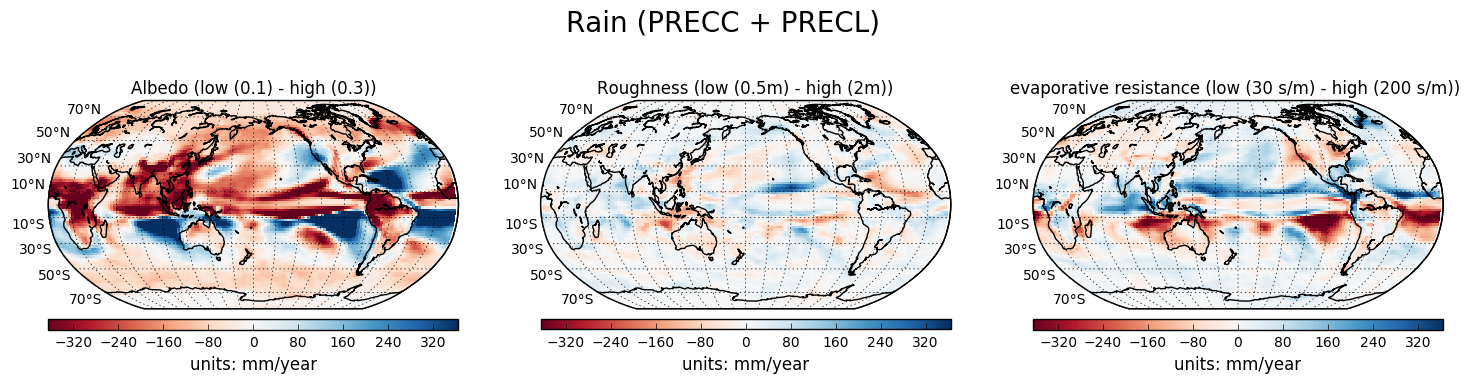

In [19]:

myvar = 'PRECC'
myvar2 = 'PRECL'
ds0 = ds_cam['global_a2_cv2_hc1_rs100']

# default units = m/s
# m/s to mm/year:
# nope, doing mm/day
# 60*60*24 = 86400

units = "mm/day"
units = "mm/year"

ttl_main = 'Rain (PRECC + PRECL)'
filename = 'rain'


cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

fig, axes = plt.subplots(1, 3, figsize=(18,6))

ax0 = axes.flatten()[0]
plt.sca(ax0)
ttl = 'Albedo (low (0.1) - high (0.3))'
#units = 'mm/day'
clim_diff = [-365,365]
clim_abs = [0.,200.]
mapdata = (ds1b.mean('time')[myvar].values.squeeze() + ds1b.mean('time')[myvar2].values.squeeze() ) - ( ds1a.mean('time')[myvar].values.squeeze() + ds1a.mean('time')[myvar2].values.squeeze())
mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)*86400*1000*365
mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
ax=ax0
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

ax1 = axes.flatten()[1]
plt.sca(ax1)
ttl = 'Roughness (low (0.5m) - high (2m))'
#units = 'fraction'
#clim_abs = [0.,1.]
#clim_diff = [-200,200]
mapdata = (ds2b.mean('time')[myvar].values.squeeze() + ds2b.mean('time')[myvar2].values.squeeze() ) - ( ds2a.mean('time')[myvar].values.squeeze() + ds2a.mean('time')[myvar2].values.squeeze())
mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)*86400*1000*365
mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
ax=ax1
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

ax2 = axes.flatten()[2]
plt.sca(ax2)
ttl = 'evaporative resistance (low (30 s/m) - high (200 s/m)) '
#units = 'mm'
#clim_abs = [0.,0.5]
#clim_diff = [-200,200]
mapdata = (ds3b.mean('time')[myvar].values.squeeze() + ds3b.mean('time')[myvar2].values.squeeze() ) - ( ds3a.mean('time')[myvar].values.squeeze() + ds3a.mean('time')[myvar2].values.squeeze())
mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)*86400*1000*365
mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
ax=ax2
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

fig.subplots_adjust(top=1.15)
fig.suptitle(ttl_main, fontsize=20)    
    
#plt.savefig(figpath+'/roughness/'+filename+'.eps', bbox_inches='tight')
fig_name = figpath+'/sensitivity/'+filename+'_mmyear.eps'
fig.savefig(fig_name,dpi=1200,transparent=True,facecolor='w',
            edgecolor='w',orientation='portrait',bbox_inches='tight', 
            pad_inches=0.1,frameon=None)


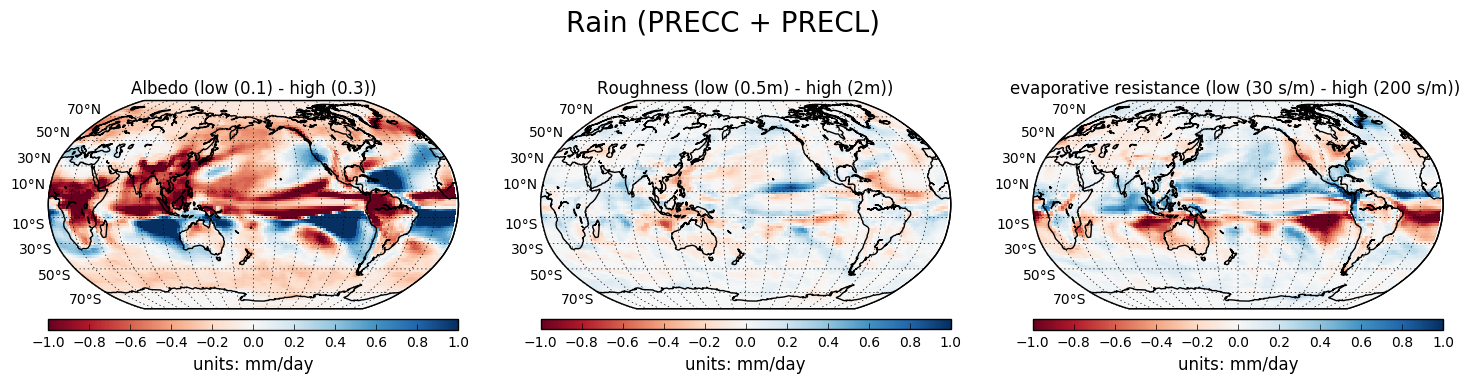

In [17]:

myvar = 'PRECC'
myvar2 = 'PRECL'
ds0 = ds_cam['global_a2_cv2_hc1_rs100']

# default units = m/s
# m/s to mm/year:
# nope, doing mm/day
# 60*60*24 = 86400

units = "mm/day"
#units = "mm/year"

ttl_main = 'Rain (PRECC + PRECL)'
filename = 'rain'


cmap_abs = plt.cm.viridis
#cmap_diff = plt.cm.RdBu

fig, axes = plt.subplots(1, 3, figsize=(18,6))

ax0 = axes.flatten()[0]
plt.sca(ax0)
ttl = 'Albedo (low (0.1) - high (0.3))'
#units = 'mm/day'
clim_diff = [-1,1]
clim_abs = [0.,200.]
mapdata = (ds1b.mean('time')[myvar].values.squeeze() + ds1b.mean('time')[myvar2].values.squeeze() ) - ( ds1a.mean('time')[myvar].values.squeeze() + ds1a.mean('time')[myvar2].values.squeeze())
mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)*86400*1000
mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
ax=ax0
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

ax1 = axes.flatten()[1]
plt.sca(ax1)
ttl = 'Roughness (low (0.5m) - high (2m))'
#units = 'fraction'
#clim_abs = [0.,1.]
#clim_diff = [-200,200]
mapdata = (ds2b.mean('time')[myvar].values.squeeze() + ds2b.mean('time')[myvar2].values.squeeze() ) - ( ds2a.mean('time')[myvar].values.squeeze() + ds2a.mean('time')[myvar2].values.squeeze())
mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)*86400*1000
mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
ax=ax1
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

ax2 = axes.flatten()[2]
plt.sca(ax2)
ttl = 'evaporative resistance (low (30 s/m) - high (200 s/m)) '
#units = 'mm'
#clim_abs = [0.,0.5]
#clim_diff = [-200,200]
mapdata = (ds3b.mean('time')[myvar].values.squeeze() + ds3b.mean('time')[myvar2].values.squeeze() ) - ( ds3a.mean('time')[myvar].values.squeeze() + ds3a.mean('time')[myvar2].values.squeeze())
mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)*86400*1000
mml_map(LN,LT,mapdata,ds0,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
ax=ax2
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

fig.subplots_adjust(top=1.15)
fig.suptitle(ttl_main, fontsize=20)    
    
#plt.savefig(figpath+'/roughness/'+filename+'.eps', bbox_inches='tight')
fig_name = figpath+'/sensitivity/'+filename+'_mmday.eps'
fig.savefig(fig_name,dpi=1200,transparent=True,facecolor='w',
            edgecolor='w',orientation='portrait',bbox_inches='tight', 
            pad_inches=0.1,frameon=None)


In [13]:
ds0['PRECC'].units


'm/s'

### Clouds

#### Total Cloud

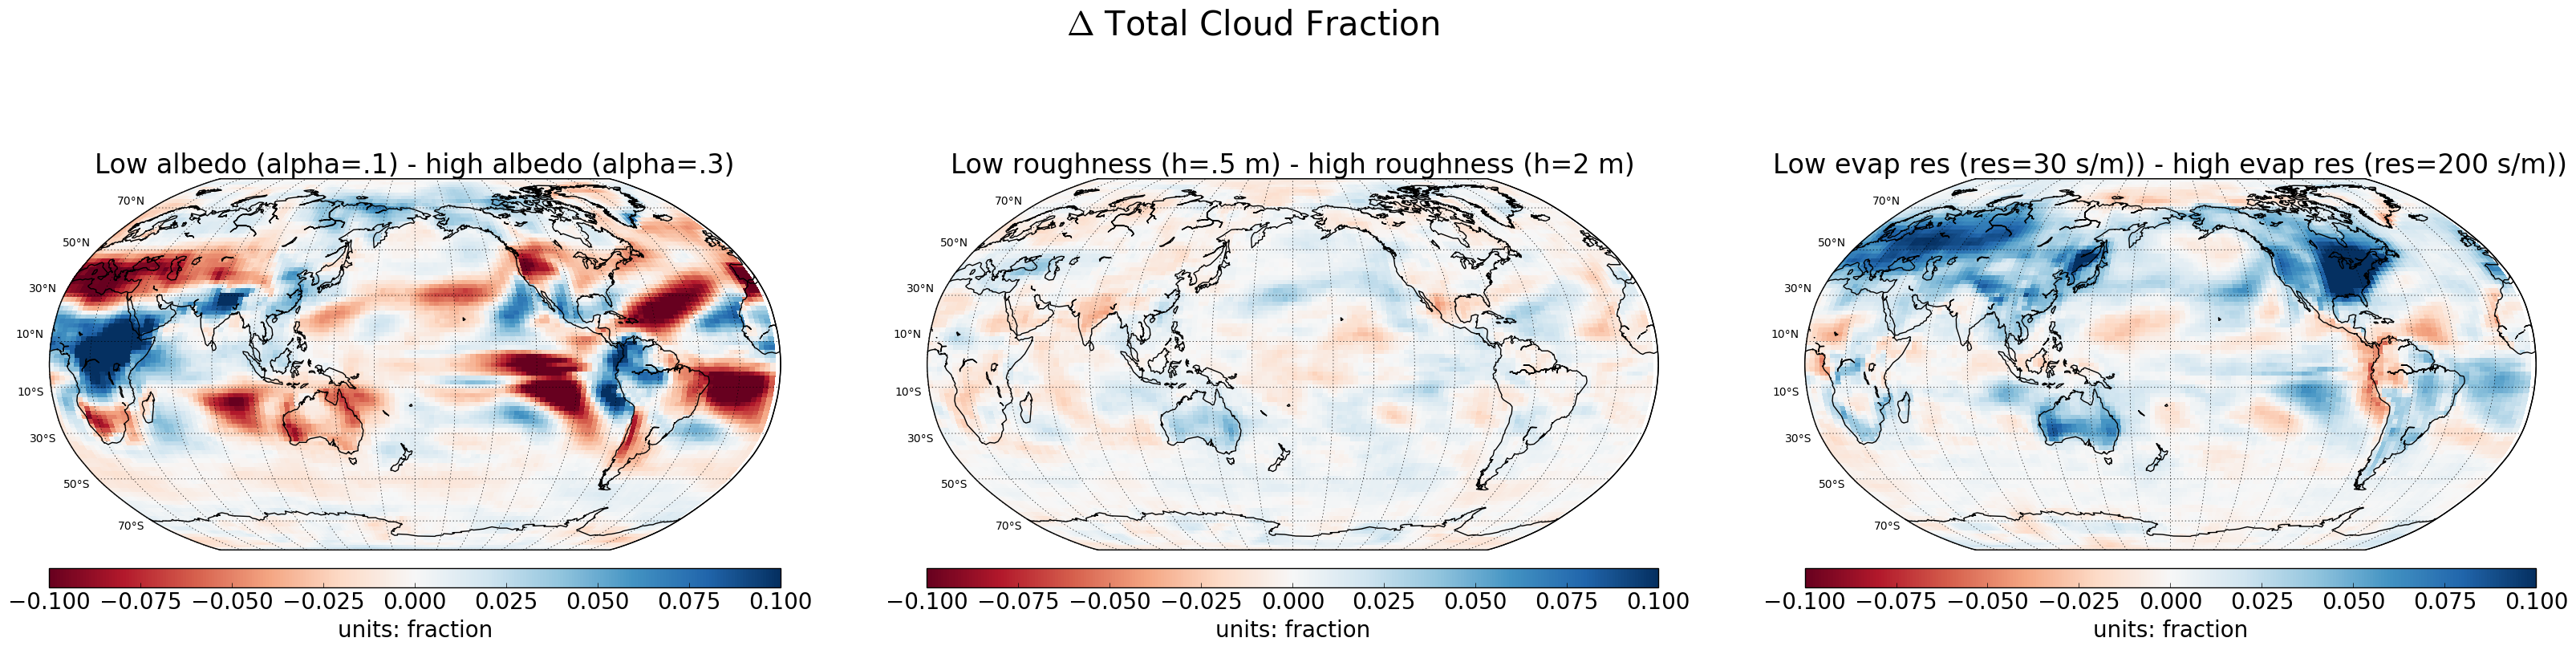

In [21]:
# Plots
myvar = 'CLDTOT'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ Total Cloud Fraction'
filename = myvar

clim_abs = [0,1]
clim_diff = [-0.1, 0.1]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


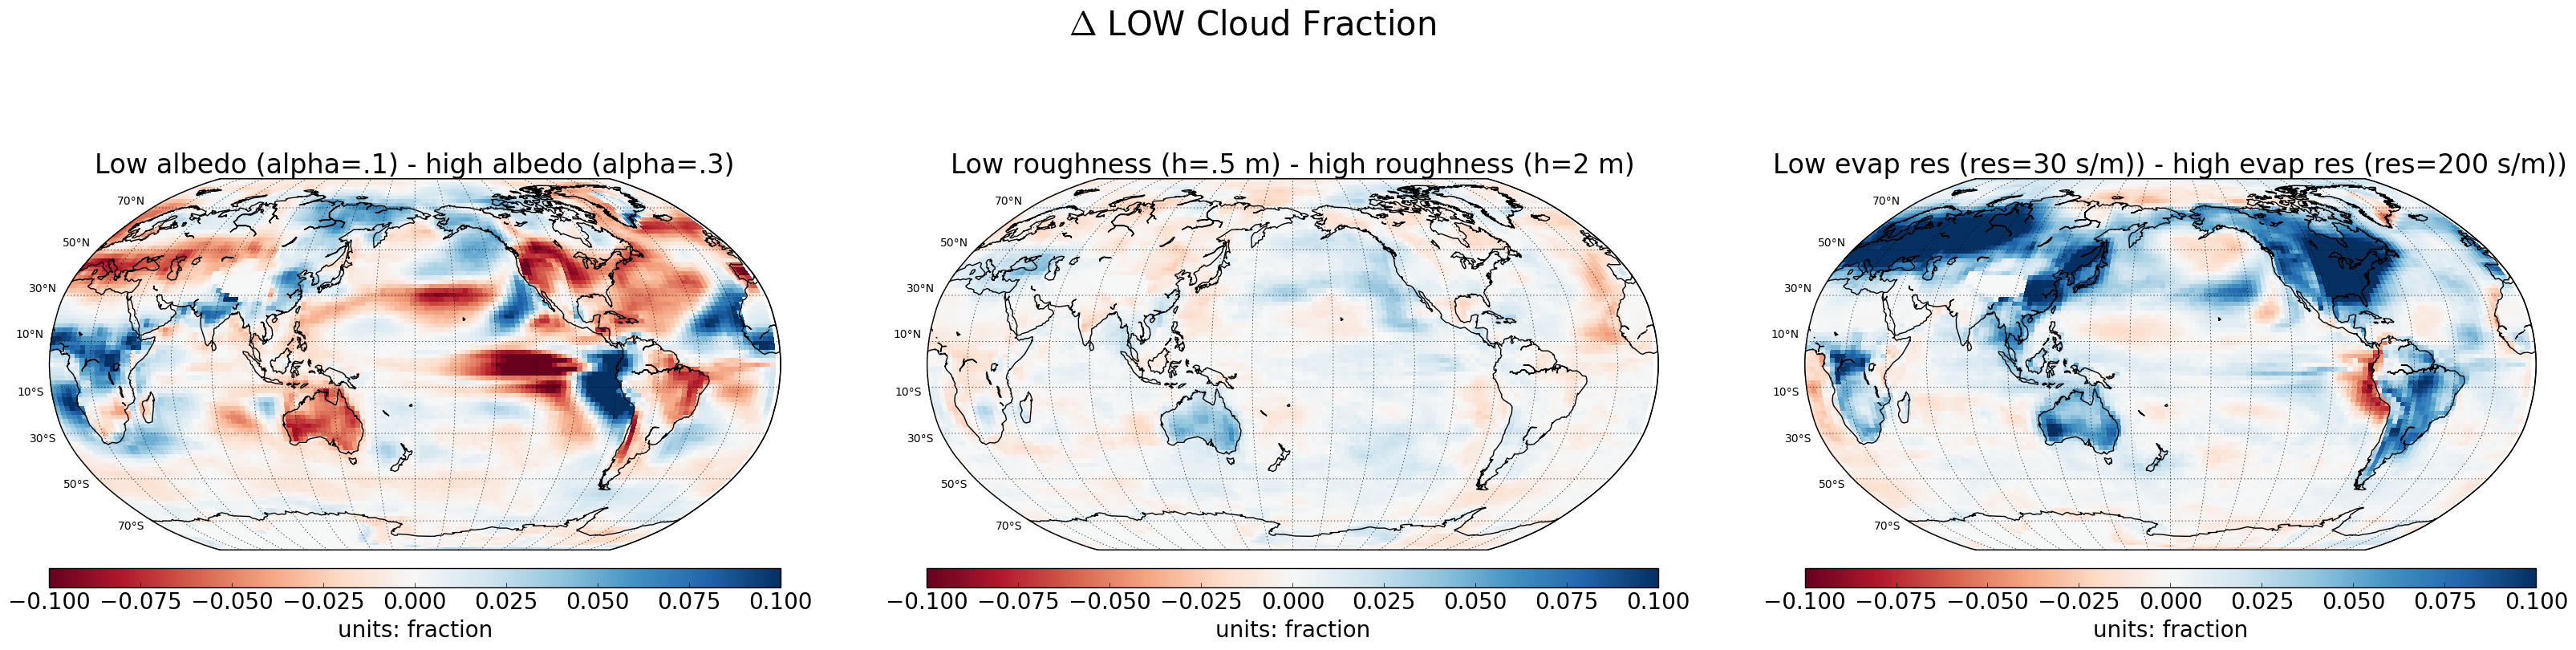

In [22]:
# Plots
myvar = 'CLDLOW'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ LOW Cloud Fraction'
filename = myvar

clim_abs = [0,1]
clim_diff = [-0.1, 0.1]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


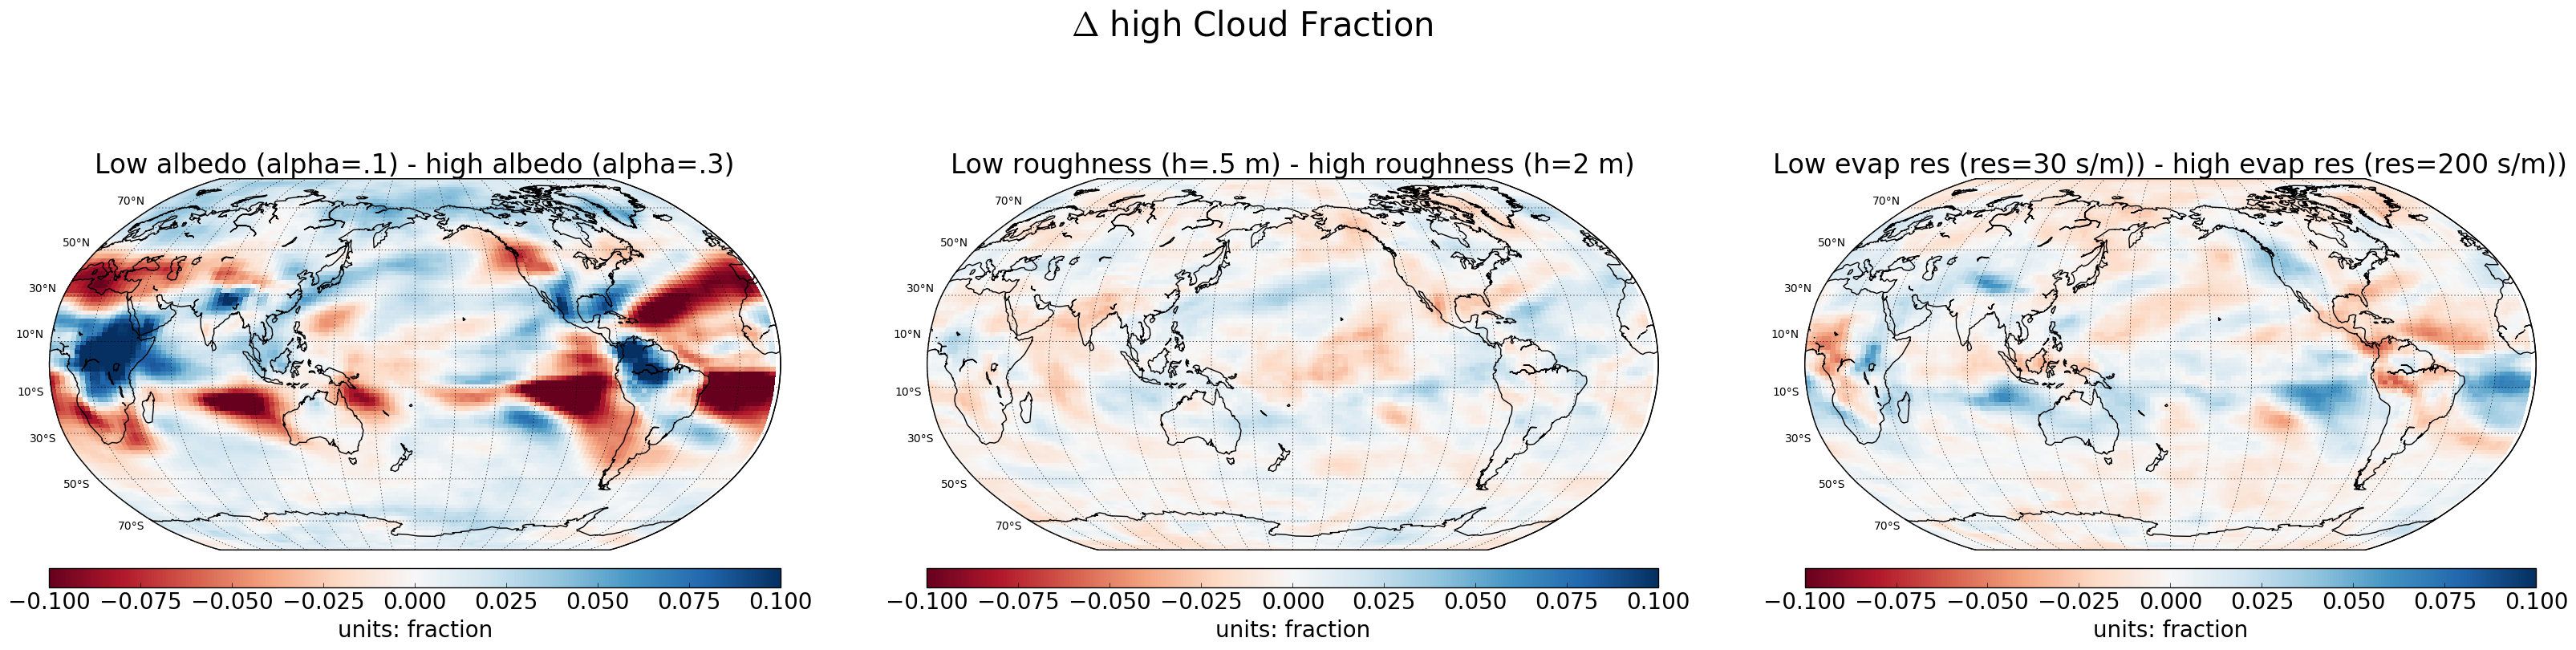

In [34]:
# Plots
myvar = 'CLDHGH'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ high Cloud Fraction'
filename = myvar

clim_abs = [0,1]
clim_diff = [-0.1, 0.1]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


## subsidence at 700 hpa

In [ ]:
# Plots
myvar = 'WSUB'

# -------------------------------
# Relevant details

units = ds0[myvar].units

hpa = ds0['lev'][20]

ttl_main = '$\Delta$ WSUB (subsidence) at 690 hpa'
filename = myvar+'700'
print(ttl_main)

clim_abs = [0,1]
clim_diff = [-0.05, 0.05]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata


# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
print(ds0['lev'][20])
print(np.shape(mapdata_nan))
mapdata_nan = mapdata_nan[20,:,:].squeeze()
print(np.shape(mapdata_nan))
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


In [ ]:
# Plots
myvar = 'WSUB'

# -------------------------------
# Relevant details

units = ds0[myvar].units

hpa = ds0['lev'][22]

ttl_main = '$\Delta$ WSUB (subsidence) at 820 hpa'
filename = myvar+'800'
print(ttl_main)

clim_abs = [0,1]
clim_diff = [-0.05, 0.05]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata


# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
print(ds0['lev'][22])
print(np.shape(mapdata_nan))
mapdata_nan = mapdata_nan[22,:,:].squeeze()
print(np.shape(mapdata_nan))
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[22,:,:].squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


In [ ]:
# Plots
myvar = 'RELHUM'

# -------------------------------
# Relevant details

units = ds0[myvar].units

hpa = ds0['lev'][20]

ttl_main = '$\Delta$ RH (%) at 690 hpa'
filename = myvar
print(ttl_main)

clim_abs = [0,1]
clim_diff = [-5, 5]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata


# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
print(ds0['lev'][20])
print(np.shape(mapdata_nan))
mapdata_nan = mapdata_nan[20,:,:].squeeze()
print(np.shape(mapdata_nan))
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_nan = mapdata_nan[20,:,:].squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert3_map_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/1by3s/'+filename+'.pdf', bbox_inches='tight')


## Vertical zonal mean cross sections

In [ ]:

fig, axes = plt.subplots(1, 1, figsize=(4,4))
ax0 = axes
plt.sca(ax0)

levels = [-2,-1,0,1,2] 
#[-10, -8, -6,-4,-2,0,2,4,6,8,10]

lat = ds0.lat.values
lev = ds0.lev.values
data1=ds0.mean('time')['T'].values - ds1a.mean('time')['T'].values 
data=np.mean(data1,axis=2)

ttl='$\Delta$ Temperature'
units='K'
clim_abs = [0,1]
clim_diff = [-2,2]#[-15, 15]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r


ax,cb = zonal_fig(data,lat,lev,colmap=cmap_diff,clim=clim_diff,ttl=ttl,units=units,levels=levels)

#cb.ax.set_xlim(200,420)

(I'm having trouble getting the colorbars on these vertical plots to acknowledge the limits I'm trying to impose on them, so they're not consistent across simulations.) 

In [ ]:

# Plots
myvar = 'T'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ Zonal Mean Temperature'
filename = myvar

clim_abs = [180,320]
clim_diff = [-2.5, 2.5]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

lat = ds0.lat.values
lev = ds0.lev.values

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert4_zonal_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)


plt.savefig(figpath+'/1by3s/'+filename+'_vert.pdf', bbox_inches='tight')



In [ ]:

# Plots
myvar = 'RELHUM'

# -------------------------------
# Relevant details

units = ds0[myvar].units

ttl_main = '$\Delta$ Zonal Mean Temperature'
filename = myvar

clim_abs = [0,100]
clim_diff = [-10, 10]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

# -------------------------------
# Mapdata

lat = ds0.lat.values
lev = ds0.lev.values

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_nan = np.mean(mapdata_nan,axis=2).squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert4_zonal_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)


plt.savefig(figpath+'/1by3s/'+filename+'_vert.pdf', bbox_inches='tight')

